In [339]:
import sympy as sp

norm = 0
T = 5-norm
R = 4.5-norm
P = 1-norm
S = 0-norm
gamma = 0.95

# There are 4 possible states for memory-1 agents
# s in {dd,dc,cd,cc}, indexed by {1,2,3,4} 

# Policies: p(s),q(s) are probabilities of cooperating in different states
p1, p2, p3, p4, q1, q2, q3, q4, b = sp.symbols('p1 p2 p3 p4 q1 q2 q3 q4 b', real=True)

# Value functions corresponding to policies
v1, v2, v3, v4 = sp.symbols('v1 v2 v3 v4', real=True)

# Define bellman equations for policy
# V(s;p,q) = E[r(a,a')+βV(s';p,q)]
# s' = aa'
eq1 = v1 - (R*p1*q1 + T*(1-p1)*q1 + P*(1-p1)*(1-q1) + S*p1*(1-q1) + b*(v4*p1*q1 + v2*(1-p1)*q1 + v1*(1-p1)*(1-q1) + v3*p1*(1-q1)))
eq2 = v2 - (R*p2*q2 + T*(1-p2)*q2 + P*(1-p2)*(1-q2) + S*p2*(1-q2) + b*(v4*p2*q2 + v2*(1-p2)*q2 + v1*(1-p2)*(1-q2) + v3*p2*(1-q2)))
eq3 = v3 - (R*p3*q3 + T*(1-p3)*q3 + P*(1-p3)*(1-q3) + S*p2*(1-q3) + b*(v4*p3*q3 + v2*(1-p3)*q3 + v1*(1-p3)*(1-q3) + v3*p3*(1-q3)))
eq4 = v4 - (R*p4*q4 + T*(1-p4)*q4 + P*(1-p4)*(1-q4) + S*p2*(1-q4) + b*(v4*p4*q4 + v2*(1-p4)*q4 + v1*(1-p4)*(1-q4) + v3*p4*(1-q4)))

# Solve the equations
solutions = sp.solve([eq1, eq2, eq3, eq4], (v1, v2, v3, v4))

# Create derivative functions
derivative_p1 = sp.diff(solutions[v1], p1)
derivative_p2 = sp.diff(solutions[v2], p2)
derivative_p3 = sp.diff(solutions[v3], p3)
derivative_p4 = sp.diff(solutions[v4], p4)
derivative_q1 = sp.diff(solutions[v1], q1)
derivative_q2 = sp.diff(solutions[v2], q2)
derivative_q3 = sp.diff(solutions[v3], q3)
derivative_q4 = sp.diff(solutions[v4], q4)

# Create a dictionary of derivative functions
derivatives = {
    'dv1p1': sp.lambdify((p1, p2, p3, p4, q1, q2, q3, q4, b), derivative_p1, 'numpy'),
    'dv2p2': sp.lambdify((p1, p2, p3, p4, q1, q2, q3, q4, b), derivative_p2, 'numpy'),
    'dv3p3': sp.lambdify((p1, p2, p3, p4, q1, q2, q3, q4, b), derivative_p3, 'numpy'),
    'dv4p4': sp.lambdify((p1, p2, p3, p4, q1, q2, q3, q4, b), derivative_p4, 'numpy'),
    'dv1q1': sp.lambdify((p1, p2, p3, p4, q1, q2, q3, q4, b), derivative_q1, 'numpy'),
    'dv2q2': sp.lambdify((p1, p2, p3, p4, q1, q2, q3, q4, b), derivative_q2, 'numpy'),
    'dv3q3': sp.lambdify((p1, p2, p3, p4, q1, q2, q3, q4, b), derivative_q3, 'numpy'),
    'dv4q4': sp.lambdify((p1, p2, p3, p4, q1, q2, q3, q4, b), derivative_q4, 'numpy')
}

def computeDerivatives(s, p1, p2, p3, p4, q1, q2, q3, q4, gamma):
    args = [p1, p2, p3, p4, q1, q2, q3, q4, gamma]
    if s == 0:
        return derivatives['dv1p1'](*args),  derivatives['dv1q1'](*args)
    if s == 1:
        return derivatives['dv2p2'](*args),  derivatives['dv2q2'](*args)
    if s == 2:
        return derivatives['dv3p3'](*args),  derivatives['dv3q3'](*args)
    if s == 3:
        return derivatives['dv4p4'](*args),  derivatives['dv4q4'](*args)

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
    
def stateTransition(a1,a2):
    if a1 == 1 and a2 == 1:
        return 3  # cc
    elif a1 == 1 and a2 == 0:
        return 2  # cd
    elif a1 == 0 and a2 == 1:
        return 1  # dc
    elif a1 == 0 and a2 == 0:
        return 0  # dd


In [340]:
# Example values
p1 = 0.3
p2 = 0.2
p3 = 0.1
p4 = 0.4
q1 = 0.5
q2 = 0.2
q3 = 0.1
q4 = 0.2
gamma = 0.0

computeDerivatives(0, p1, p2, p3, p4, q1, q2, q3, q4, gamma)

(-0.75, 4.15)

[0.10229443 0.7987362  0.17975737 1.        ] [0.31931771 0.85756242 0.17975737 1.        ] 6.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


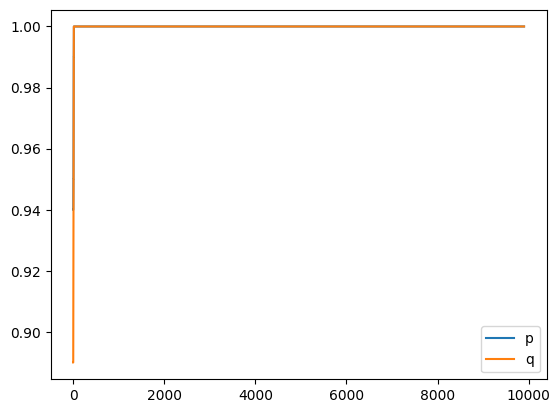

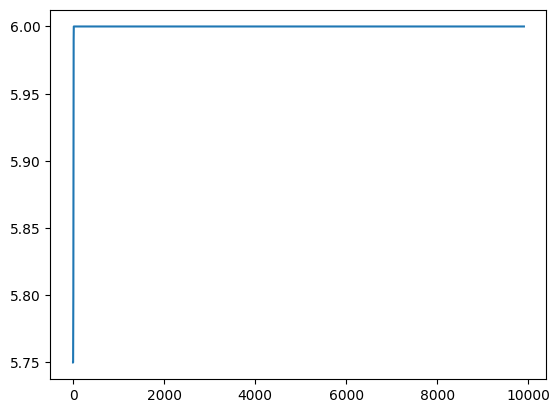

In [342]:
import numpy as np
import matplotlib.pyplot as plt
payoff = np.array([[1, 5], 
                   [0, 3]])

# parameters
N = 10000 
data = []
for i in range(1):
    alpha = 0.0001
    gamma = 0.99
    p = np.array([0.1, 0.8, 0.1, 0.8])
    q = np.array([0.1, 0.1, 0.8, 0.8])
    s = 3
    p = np.clip(p,0,1)
    q = np.clip(q,0,1)
    p_init = p.copy()
    q_init = p.copy()
    actions1 = []
    actions2 = []
    rewards = []
    for period in range(N):
        # play prisioners' dilemma
        a1 = np.random.choice([0,1],p=[1-p[s],p[s]])
        a2 = np.random.choice([0,1],p=[1-q[s],q[s]])
        r1 = payoff[a1, a2]
        r2 = payoff[a2, a1]

        # record actions and rewards
        actions1.append(a1)
        actions2.append(a2)
        rewards.append(r1+r2)

        # derivatives to Value function
        dVdp, dVdq = computeDerivatives(s, p[0], p[1], p[2], p[3], q[0], q[1], q[2], q[3], gamma)
        
        # Update p(s) and adjust other probabilities
        p[s] = p[s] + alpha * r1 * dVdp
        q[s] = p[s] + alpha * r2 * dVdq
        p = np.clip(p,0,1)
        q = np.clip(q,0,1)

        # Determine the state transition based on the actions played
        s = stateTransition(a1,a2)
    p_final = p.copy()
    q_final = q.copy()
    avg_reward = np.mean(rewards[-100:])
    std_reward = np.std(rewards[-100:])
    print(p, q, avg_reward)
    data.append([p,q,alpha,gamma,N, p_final,q_final,avg_reward,std_reward,actions1,actions2])

print(actions1[-10:], actions2[-10:])
plt.plot(moving_average(actions1,100), label = 'p')
plt.plot(moving_average(actions2,100), label = 'q')
plt.legend()
plt.show()
plt.plot(moving_average(rewards,100), label = 'r')


In [230]:
import pandas as pd
df = pd.DataFrame(data, columns = ['p','q','alpha','gamma','N','p_final','q_final','avg_reward','std_reward','actions1','actions2'])

In [231]:
df.tail(20)

,p,q,alpha,gamma,N,p_final,q_final,avg_reward,std_reward,actions1,actions2
0,"[0.0, 0.0, 0.0, 0.01]","[0.0, 0.0, 0.0, 0.0]",0.01,0.0,10000,"[0.0, 0.0, 0.0, 0.01]","[0.0, 0.0, 0.0, 0.0]",2.0,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [185]:
df[['avg_reward', 'std_reward', 'gamma', 'alpha']].corr()

,avg_reward,std_reward,gamma,alpha
avg_reward,1.000000,-0.753864,-0.302426,-0.587445
std_reward,-0.753864,1.000000,0.604910,0.314713
gamma,-0.302426,0.604910,1.000000,-0.085369
alpha,-0.587445,0.314713,-0.085369,1.000000


In [189]:
df[df.gamma==0.99].describe()

,alpha,gamma,N,avg_reward,std_reward
count,20.000000,2.000000e+01,20.0,20.000000,20.000000
mean,0.041725,9.900000e-01,5000.0,5.129500,1.212905
std,0.048928,3.417194e-16,0.0,0.479182,0.651683
min,0.000100,9.900000e-01,5000.0,4.360000,0.000000
25%,0.000775,9.900000e-01,5000.0,4.865000,0.499900
50%,0.010000,9.900000e-01,5000.0,4.945000,1.638593
75%,0.100000,9.900000e-01,5000.0,5.535000,1.696041
max,0.100000,9.900000e-01,5000.0,5.940000,1.841304
